<a href="https://colab.research.google.com/github/mmaithani/data-science/blob/main/PyTorch_ts_time_series_forecasting(gluonts).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pytorchts

     |████████████████████████████████| 133kB 6.7MB/s 
     |████████████████████████████████| 10.1MB 15.7MB/s 
     |████████████████████████████████| 9.2MB 17.8MB/s 
     |████████████████████████████████| 1.4MB 51.4MB/s 
  Created wheel for pytorchts: filename=pytorchts-0.2.0-cp36-none-any.whl size=160984 sha256=42c1d98437121b8a1d47acd8306f2e8bfd4217bac3131293bfd4e20f1afb9ff8
  Stored in directory: /root/.cache/pip/wheels/12/ee/34/9834a5114abdb5a1ae388b778b29847380e093e16de7f172d8
Successfully built pytorchts
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.0.5 which is incompatible.
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import torch

from pts.dataset import ListDataset
from pts.model.deepar import DeepAREstimator
from pts import Trainer
from pts.dataset import to_pandas

In [2]:
url = "https://raw.githubusercontent.com/numenta/NAB/master/data/realTweets/Twitter_volume_AMZN.csv"
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True)
df.head()

,value
timestamp,
2015-02-26 21:42:53,57
2015-02-26 21:47:53,43
2015-02-26 21:52:53,55
2015-02-26 21:57:53,64
2015-02-26 22:02:53,93


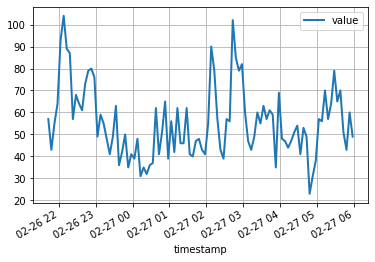

In [3]:
df[:100].plot(linewidth=2)
plt.grid(which='both')
plt.show()

In [5]:
training_data = ListDataset(
    [{"start": df.index[0], "target": df.value[:"2015-04-05 00:00:00"]}],
    freq = "5min"
)

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

estimator = DeepAREstimator(freq="5min",
                            prediction_length=12,
                            input_size=43,
                            trainer=Trainer(epochs=15,
                                            device=device))
predictor = estimator.train(training_data=training_data)

48it [00:09,  5.22it/s, avg_epoch_loss=4.75, epoch=0]
48it [00:05,  8.98it/s, avg_epoch_loss=4.26, epoch=1]
49it [00:05,  9.19it/s, avg_epoch_loss=4.16, epoch=2]
47it [00:05,  8.61it/s, avg_epoch_loss=4.12, epoch=3]
49it [00:05,  9.10it/s, avg_epoch_loss=4.09, epoch=4]
49it [00:05,  9.22it/s, avg_epoch_loss=4.06, epoch=5]
49it [00:05,  9.02it/s, avg_epoch_loss=4.04, epoch=6]
49it [00:05,  9.41it/s, avg_epoch_loss=4.02, epoch=7]
49it [00:05,  9.53it/s, avg_epoch_loss=4, epoch=8]
49it [00:05,  8.99it/s, avg_epoch_loss=3.99, epoch=9]
48it [00:05,  8.76it/s, avg_epoch_loss=3.98, epoch=10]
48it [00:05,  8.97it/s, avg_epoch_loss=3.98, epoch=11]
47it [00:05,  9.12it/s, avg_epoch_loss=3.97, epoch=12]
48it [00:05,  9.18it/s, avg_epoch_loss=3.97, epoch=13]
48it [00:05,  9.38it/s, avg_epoch_loss=3.96, epoch=14]


In [7]:
test_data = ListDataset(
    [{"start": df.index[0], "target": df.value[:"2015-04-15 00:00:00"]}],
    freq = "5min"
)

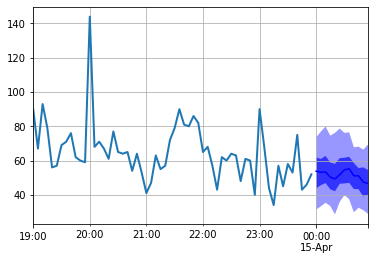

In [8]:
for test_entry, forecast in zip(test_data, predictor.predict(test_data)):
    to_pandas(test_entry)[-60:].plot(linewidth=2)
    forecast.plot(color='b', prediction_intervals=[50.0, 90.0])
plt.grid(which='both')